<center><img src=https://www.toronto.ca/wp-content/uploads/2023/10/9744-Cycling-Network-graphic-2023-10-31-1024x338.png /></center>

<center><h1>City Bike Planning</h1></center>
<center>Collaborators: Ankith Bachhu, Shaunak Roy, Dominick Cardone, Daniel Lu</center>

## Table of Contents
1. [Introduction](#Introduction) <br> 
2. [Part 1: Data Collection](#Part-1:-Data-Collection) <br>
3. [Part 2: Data Cleaning & Exploratory Analysis](#Part-2:-Data-Cleaning-&-Exploratory-Analysis) <br>
4. [Part 3: Model Training and Testing](#Part-3:-Model-training-and-testing) <br>
5. [Part 4: Interpretation of Results](#Part-4:-Interpretation-of-Results) <br>
6. [Conclusion](#Conclusion) <br>
7. [References](#References)

## Introduction
The purpose of this tutorial is to walk you through the data science lifecycle, introducing you to many different data science concepts. The data science lifecycle goes as follows: 
1. Data collection
3. Data processing
4. Exploratory analysis and Data visualization
5. Model analysis and testing
6. Interpretation of results

The whole purpose of the data science lifecycle is to identify trends or patterns, investigate or answer a question, or solve a problem. In this tutorial, we will be looking to answer the question: SOMETHING SOMETHING SOMETHING. By coming up with a answer, we will be able to SOMETHING SOMETHING SOMETHING. 

**IMPORTANT** 
<br>For this tutorial there may be some key terms you need to be familiar with:
- Observation: Refers to a row...
**May not need this section, if there are no other key terms, cuz I can refer to observations as just bike rides instead**

**We will dive into the purpose behind each step as we continue on deeper later, and then we talk about the importance of this tutorial in terms of city bike planning, maybe something related to enviromental friendly etc.**

## Part 1: Data Collection
In order to reach our end goal and finding OUR GOAL FOR QUESTION OR PROBLEM OR SOMETHING SOMETHING, we must first begin by collecting the data necessary to answer our question. It is important to find the appropriate dataset for your situation, as later on, your machine learning model is as good as the data you feed into it. And since your machine learning model is the tool that will be used to find the answer to your question, then essentially your answer is reliant on the dataset you use. Therefore, it is important to collect the appropriate dataset.

Usually, a company may have to conduct their own experiments or studies to collect the necessary data they need. However, oftentimes, these tasks are already done by other companies, and avaialble to use for the public. For our tutorial, we will be using a dataset provided by Capital Bike Share.

**MAYBE talk about the creidbilty behind Capital Bike Share a little bit.**


<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Quantitative-data-collection-methods-1-700x545.png"></center>

### Import Python Libraries
To begin this tutorial, we first need to import the necessary Python libraries (as shown below), which will be used for this tutorial. You should use Jupyter Notebook, as most of the code provided is run in Jupyter Notebook. Jupyter Notebook is also widely used by data scientists, as it allows us to better visualize our data and other analysis. We will dive more in detail about the use of each of these libraries as we encounter and use each one.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns

# Filter out the warnings
import warnings
warnings.filterwarnings("ignore")

### Download and import the data
Navigate to https://s3.amazonaws.com/capitalbikeshare-data/index.html and download any of the zip files. Extract the csv file from the zip file, and **make sure you move it to the same folder** as the one in which you are running your python program or Jupyter Notebook. For the purpose of this tutorial, it would be helpful to download the same zip file we did, if you want to compare your results with the tutorial's.

In [23]:
# Read in the csv file
df = pd.read_csv(r"202402-capitalbikeshare-tripdata.csv")

If you downloaded the same csv file, run the code below, and compare your results, it should be the same.

In [24]:
# Print out the head of the table imported
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Part 2: Data Cleaning & Exploratory Analysis
Now that we have our data, the next step is to clean our data. *What does it mean to clean our data?* It is exactly how it sounds, we will need to make changes to our data in order to make it ready to be processed by our machine learning model or just easier for us to analyze. This process may involve many different things, some examples are:
* Deleting unnecessary data
* Filling in missing data
* Changing the values or metrics/measurements of our data
* Calculating new data point from existing data
* Reordering data in a new way that makes it easier to read or work with machine learning model???<br>

Now, you may have noticed we combined two steps of the data science lifecycle: Data cleaning & Exploratory Analysis. We've combined these two steps, because sometimes it is helpful to perform exploratory analysis on our dataset, in order to help determine what things we need to clean. For example, we may plot a graph of two data points, in order to see if there any noticeable trends, which may prompt us to create a new data point, that we may believe to be useful for the machine learning model to use.

In simple terms, exploratory analysis, is performing any sort of analysis on your dataset before we pass it into the machine learning model. This process may involve creating graphs or plotting values of a certain data point. Essentially, we may be trying to answer the question before passing it into the machine learning model, making any predictions or identifying any trends, which may prove useful in interpreting our results later on after the machine learning model. This analysis may also help guide our question or research, as mentioned earlier, where we may notice one data point is significant in some sort of way.

**PLEASE FACT CHECK WHAT IM WRITING**

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/data-collection-methods-700x545.png"></center>

First let's list out some information about each column (aka our data points). This step will help us see if there are any data types which we may need to change for the purpose of being able to calculate additonal data points and be used in our machine learning model.

In [25]:
# List out information about each of the entries of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318688 entries, 0 to 318687
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             318688 non-null  object 
 1   rideable_type       318688 non-null  object 
 2   started_at          318688 non-null  object 
 3   ended_at            318688 non-null  object 
 4   start_station_name  270637 non-null  object 
 5   start_station_id    270637 non-null  float64
 6   end_station_name    267827 non-null  object 
 7   end_station_id      267824 non-null  float64
 8   start_lat           318688 non-null  float64
 9   start_lng           318688 non-null  float64
 10  end_lat             318444 non-null  float64
 11  end_lng             318444 non-null  float64
 12  member_casual       318688 non-null  object 
dtypes: float64(6), object(7)
memory usage: 31.6+ MB


### Drop Some Unnecessary Data
Next, let's drop some unnecessary data. *How did we determine that this data was unnecessary?* AND THEN SOME VALID REASON ABOUT THAT

In [26]:
# Drop start and end station id columns
df.drop(["start_station_id", "end_station_id"], axis=1, inplace=True)

# Drop ride id column
df.drop(["ride_id"], axis=1, inplace=True)

In [27]:
# List out unique bike types
df["rideable_type"].unique()

array(['electric_bike', 'classic_bike'], dtype=object)

Let's drop some of the observations which are missing entries or data points. This step is important, as having observations with missing data points may lead to errors when running code later. It also doesn't make sense to incldue them, since if our machine learning model relies on data points to make predictions, if a datapoint has no value, it could interefere or screw with our predictions.

In [28]:
# Drop any observations, where there are missing entries or data points
df.dropna(axis=0, inplace=True)

In [29]:
# List out info of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246639 entries, 0 to 318687
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       246639 non-null  object 
 1   started_at          246639 non-null  object 
 2   ended_at            246639 non-null  object 
 3   start_station_name  246639 non-null  object 
 4   end_station_name    246639 non-null  object 
 5   start_lat           246639 non-null  float64
 6   start_lng           246639 non-null  float64
 7   end_lat             246639 non-null  float64
 8   end_lng             246639 non-null  float64
 9   member_casual       246639 non-null  object 
dtypes: float64(4), object(6)
memory usage: 20.7+ MB


In [30]:
# Print out table again to check it
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
16,electric_bike,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
17,classic_bike,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
18,classic_bike,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
19,classic_bike,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


This step is more specific for pandas Dataframe, but nonetheless important. It resets our indices to be in order from 0,1,..., some integer. As we can see above, the indices are scattered, skipping from 0 to 16. These indices may prevent us from performing other data cleaning later on, as well as causing potential errors.

In [31]:
# Reset indices of table and print out table again to check it
df.reset_index(drop=True, inplace=True)
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


Next, let's convert the data types of our data points. Specifically in this case, we are converting our strings to be datetime objects, as converting it to datetime objects will allow us to perform necessary operations or arithmetic later.

In [32]:
# Convert datatypes to datetime objects
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(4)
memory usage: 18.8+ MB


In [33]:
# Print out top of table to check
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member
1,electric_bike,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member
2,classic_bike,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member
3,classic_bike,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member
4,classic_bike,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual


Let's perform some arithemtic with our datetime objects we converted earlier. We are subtracting the start and end times, in order to calculate a new data point, which is the duration of the bike ride. We then need to convert it into total number of minutes.

In [34]:
# Create new column and data point time duration
df["time_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds()/60

# Print out top of table to check again
df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,time_duration
0,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,member,8.766667
1,electric_bike,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,member,12.883333
2,classic_bike,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,member,30.183333
3,classic_bike,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,member,12.833333
4,classic_bike,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,casual,12.633333


In [35]:
# List out column infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rideable_type       246639 non-null  object        
 1   started_at          246639 non-null  datetime64[ns]
 2   ended_at            246639 non-null  datetime64[ns]
 3   start_station_name  246639 non-null  object        
 4   end_station_name    246639 non-null  object        
 5   start_lat           246639 non-null  float64       
 6   start_lng           246639 non-null  float64       
 7   end_lat             246639 non-null  float64       
 8   end_lng             246639 non-null  float64       
 9   member_casual       246639 non-null  object        
 10  time_duration       246639 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(4)
memory usage: 20.7+ MB


### Some Exploratory Analysis #1
Let's perform some exploratory analysis. Let's create countplot of the type of bike: electric or regular. *Why do you think we are doing this?* 
THEN PROVIDE SOME REASON

In [36]:
# Create a countplot for the type of bikes
plt.figure(figsize=(12,10))
sns.countplot(df["rideable_type"])

ValueError: could not convert string to float: 'electric_bike'

<Figure size 1200x1000 with 0 Axes>

### One Hot Encoding
Now, one hot encoding is an important method for data scientists. It is used to represent multiple classes. Usually, when representing just two classes, we would use 0 for one class and 1 for the other class. 

*But, what do we do for multiple classes?* <br>

Many people may initally think we can just use 1 for one class, 2 for the next class, 3 for the next class, and so on. However, these values may influence our machine learning algorithms, potentially giving more weight to one class compared to the others **IDK WHAT IM SAYING**. This is where one hot encoding is useful. With one hot encoding...WE CAN SOMETHING SOMETHING

In [37]:
# Create one hot encodings for the rideable_type and member_casual
df = pd.get_dummies(df, columns=['rideable_type', 'member_casual'], drop_first=True)

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member
0,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,8.766667,True,True
1,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,12.883333,True,True
2,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,30.183333,False,True
3,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,12.833333,False,True
4,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,12.633333,False,False


Let's perform some arithmetic using some of the data we already have. More specifically, we are calculating a new data point, the distance for each ride. In order to accomplish this task, we are using the Haversine Distance formula, which allows us to calculate the distacne between two ponts given their latitude and longitude coordinates. This is really helpful in the real world, as we live on a spherical ball. **MAYBE MORE FUN FACTS ABOUT HAVERSINE AND ITS USE CASES?**

In [38]:
# Create function for Haversine Distance formula
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points given their latitude and longitude coordinates.
    """
    R = 6371  # Radius of the Earth in kilometers
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    distance = R * c
    
    return distance

In [39]:
# Create new distance column calculating the haversine distance for each observation
df['distance_km'] = haversine_distance(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km
0,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,8.766667,True,True,1.493573
1,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,12.883333,True,True,3.321546
2,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,30.183333,False,True,4.672147
3,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,12.833333,False,True,2.276269
4,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,12.633333,False,False,1.364261


In [40]:
# Print out number of unique start stations
df["start_station_name"].nunique()

764

In [41]:
# Print out count for each station name
df["start_station_name"].value_counts()

start_station_name
Columbus Circle / Union Station                        3566
New Hampshire Ave & T St NW                            3023
15th & P St NW                                         2489
Eastern Market Metro / Pennsylvania Ave & 8th St SE    2256
5th & K St NW                                          2188
                                                       ... 
Oak Leaf & Lockwood                                       1
Layton Hall Dr & University Dr                            1
Dennis Ave & Amherst Ave                                  1
Stewart & April                                           1
Mission Square Dr & Miranda Ct                            1
Name: count, Length: 764, dtype: int64

Let's calculate another new data point. In this case, we are calculating average speed, as we believe this may be another metric which could give us valuable insight into our goal. **WHAT IS OUR GOAL?**

In [42]:
# Calculate new column average speed
df["average_speed"] = df["distance_km"] / df["time_duration"] * 60

# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,8.766667,True,True,1.493573,10.222169
1,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,12.883333,True,True,3.321546,15.469038
2,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,30.183333,False,True,4.672147,9.287537
3,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,12.833333,False,True,2.276269,10.642297
4,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,12.633333,False,False,1.364261,6.479339


In [77]:
# Print out count for different values of time duration
df["time_duration"].value_counts()

time_duration
5.700000      350
4.966667      349
4.900000      348
4.483333      342
5.800000      341
             ... 
183.033333      1
68.850000       1
58.816667       1
154.016667      1
68.700000       1
Name: count, Length: 6628, dtype: int64

### Some Exploratory Analysis #2
Now, let's perform some exploratory analysis. We are trying to see the frequency of observations, which fall within the variety of time durations. As we can see from the graph, we know that a large majority of the data points lie below 200 minutes. Therefore, we have the choice of removing any data points above 200 minutes, as they may be outliers. WHY HISTOGRAM?

(array([2.45939e+05, 4.83000e+02, 4.90000e+01, 2.60000e+01, 1.70000e+01,
        2.50000e+01, 2.70000e+01, 2.80000e+01, 2.60000e+01, 1.90000e+01]),
 array([   0.        ,  149.62333333,  299.24666667,  448.87      ,
         598.49333333,  748.11666667,  897.74      , 1047.36333333,
        1196.98666667, 1346.61      , 1496.23333333]),
 <BarContainer object of 10 artists>)

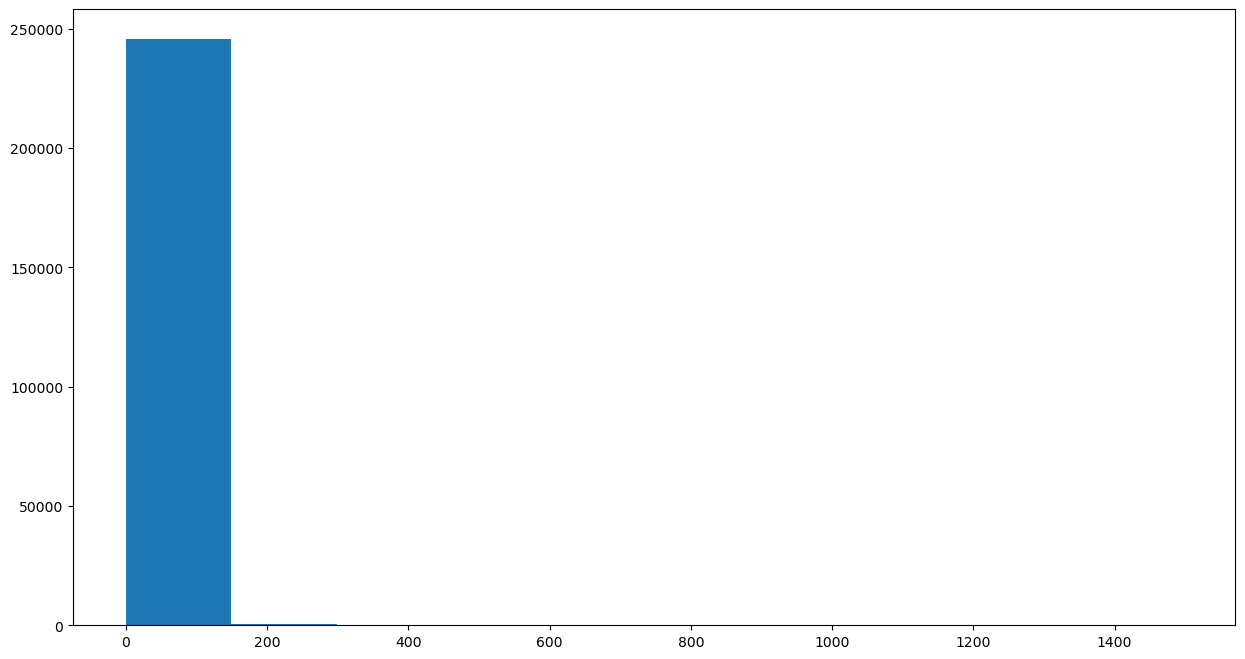

In [78]:
# Plot a histogram of time duration
plt.figure(figsize=(15,8))
plt.hist(df["time_duration"])

In [79]:
# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246639 entries, 0 to 246638
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   246639 non-null  datetime64[ns]
 1   ended_at                     246639 non-null  datetime64[ns]
 2   start_station_name           246639 non-null  object        
 3   end_station_name             246639 non-null  object        
 4   start_lat                    246639 non-null  float64       
 5   start_lng                    246639 non-null  float64       
 6   end_lat                      246639 non-null  float64       
 7   end_lng                      246639 non-null  float64       
 8   time_duration                246639 non-null  float64       
 9   rideable_type_electric_bike  246639 non-null  bool          
 10  member_casual_member         246639 non-null  bool          
 11  distance_km               

Next, let's drop some unreasonable data points. In this code, we'll drop any time durations below 0 minutes, as such a bike ride is too short. WHAT MIGHT THIS DO TO OUR DATA?

In [80]:
# Drop time durations under 0 minutes, too short
df.drop(df[df["time_duration"] <= 0].index, axis = 0, inplace=True)

# Print top of table to check
df.head()

In [82]:
# List out columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246611 entries, 0 to 246638
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   started_at                   246611 non-null  datetime64[ns]
 1   ended_at                     246611 non-null  datetime64[ns]
 2   start_station_name           246611 non-null  object        
 3   end_station_name             246611 non-null  object        
 4   start_lat                    246611 non-null  float64       
 5   start_lng                    246611 non-null  float64       
 6   end_lat                      246611 non-null  float64       
 7   end_lng                      246611 non-null  float64       
 8   time_duration                246611 non-null  float64       
 9   rideable_type_electric_bike  246611 non-null  bool          
 10  member_casual_member         246611 non-null  bool          
 11  distance_km                  24

### Some Exploratory Analysis #3
Let's perform some more exploratory analysis. From outputting our data table early on, did you notice some peculiar data points, specifically for our 'time duration' and 'average speed' data points? Some of the values seemed a little to unrealistic, for example, a person was riding for a total of 1400 minutes, which is about 24 hours??? On the other hand for average speed, some people were traveling at 2500 km/min DOUBLE CHECK THIS VALUE?? Sometimes, unrealistic data points may have been a result of an error or mistake in the data collection phase. Therefore, it is important to identify these points, and eliminate any points, which may seem incorrect. The graph below serves to compare these potential outliers, and identify any other ones. WHY WE PLOT AVERGAE SPEED VS TIME DURATION? MAYBE MENTION SCATTER PLOT ALSO GOOD FOR SEEING RELATIONSHIPS BETWEEN TWO VARIABLES?

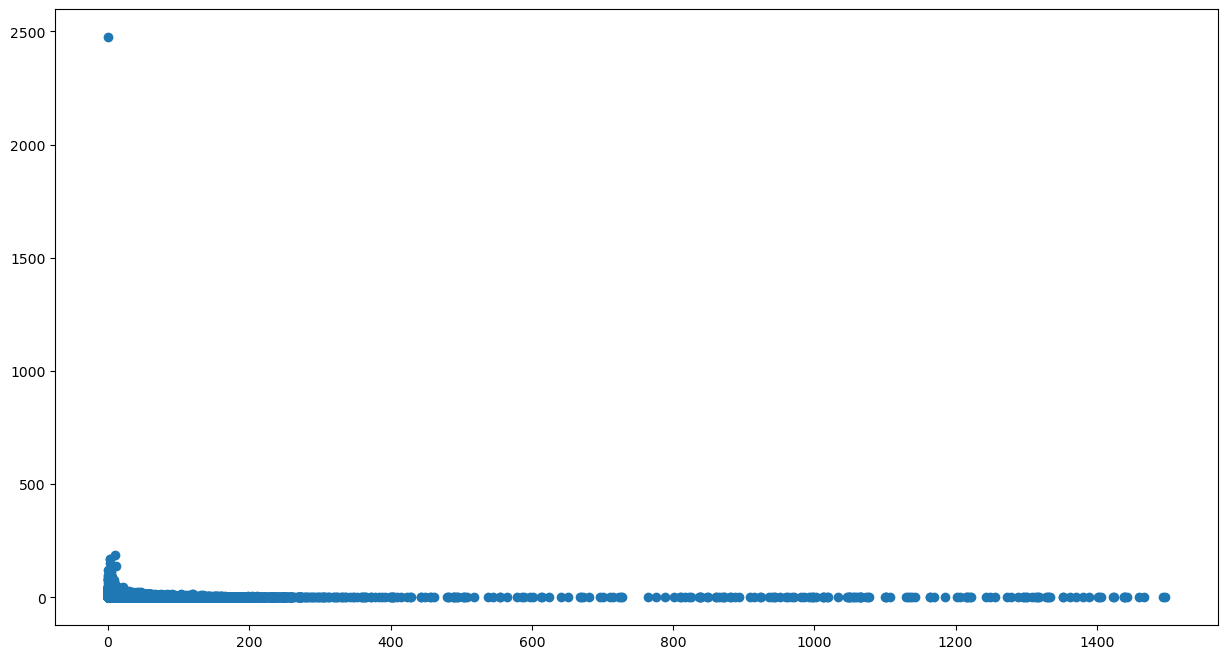

In [83]:
# Create scatter plot for average speed vs time duration
plt.figure(figsize=(15,8))
plt.scatter(df["time_duration"], df["average_speed"])

After examining the graph, do you see anything worth noticing? If you look carefully, we notice that most of the average speeds lie under a certain value of about 35 km/min (METRIC IS CORRET OR NAH). Therefore, let's only include data points which lie below this value. Let's also sort our observations based on these values, so that it is easier to see our minimum and maximum average speeds. 

Note: We are creating a new dataframe so that we don't change any of the values in our original dataframe. MORE REASONING?

In [84]:
# Keep observations with average speed below 35, and sort them
filtered_df = df[df['average_speed'] <= 35].sort_values(by='average_speed')

# Print out top of table to check
filtered_df.head()

Now, we will eliminate some more data points, in which seem unreaasonable. First, let's get rid of any bike rides where the start and end destination were the exact same. It is most likely these individuals barely moved, therefore, leading to inaccurate data. 

In [86]:
# Drop same start and end stations
filtered_df.drop(filtered_df[filtered_df["start_station_name"] == filtered_df["end_station_name"]].index, inplace=True)

Now, let's drop data points, where an individual was traveling below 0.2 km, as this only 200 meters. Some of the fastest people in the world run this distance in less than 20 seconds. Therefore, this bike ride would be incredibly short.

In [87]:
# Drop observations with distance under 0.2 km
filtered_df.drop(filtered_df[filtered_df["distance_km"] <= .2].index, inplace=True)

Now, let's drop data points, where the time spent riding the bike was greater than 300 minutes. Sometimes, data scientists will eliminate data points based on personal intuition, rather than relying on research. It is usually safer to rely on research or logic to back up your actions. However, for the purpose of this tutorial, we can agree that riding on a bike for more than 5 hours may be too long/unreasonable.

In [88]:
# Drop time durations longer than 300 minutes
filtered_df.drop(filtered_df[filtered_df["time_duration"] >= 300].index, inplace=True)

### Some Exploratory Analysis #4
Let's perform some more exploratory analysis. Let's plot the distance traveled vs the average speed. *Why do you think we are doing this?* 
THEN PROVIDE SOME REASON

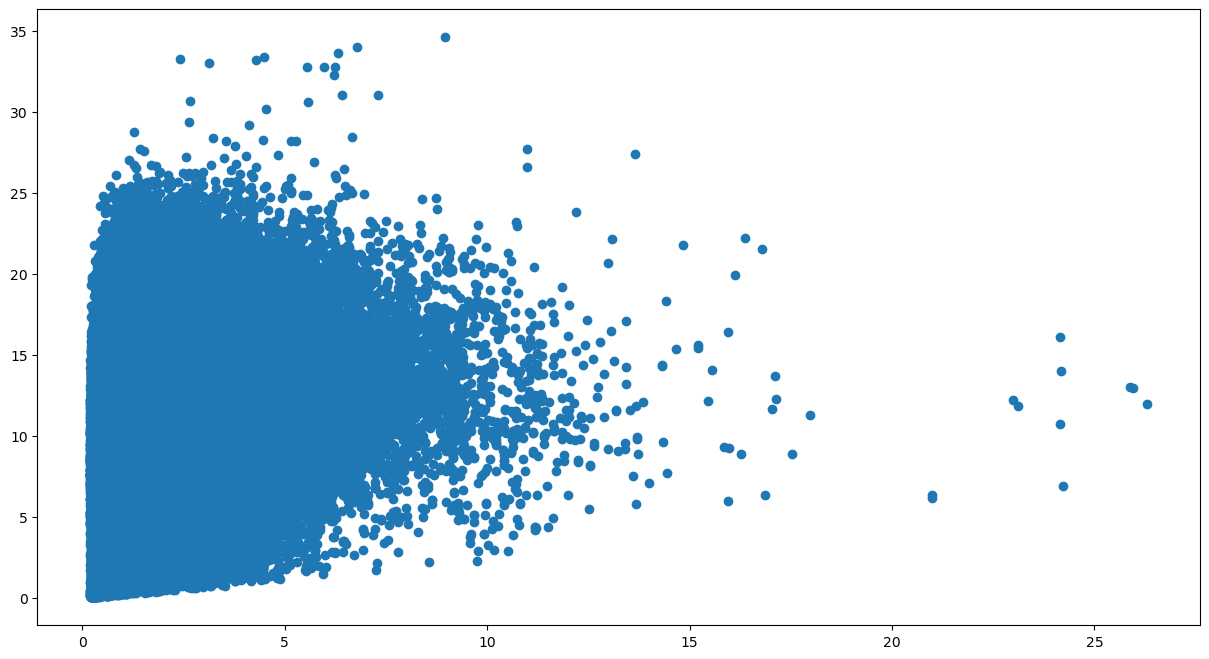

In [89]:
# Create scatter plot for average speed vs distance
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["distance_km"], filtered_df["average_speed"])

### Some Exploratory Analysis #5
Let's perform some more exploratory analysis. This time, let's do something similar, but instead plot the time duration vs the average speed. *Why do you think we are doing this?* 
THEN PROVIDE SOME REASON

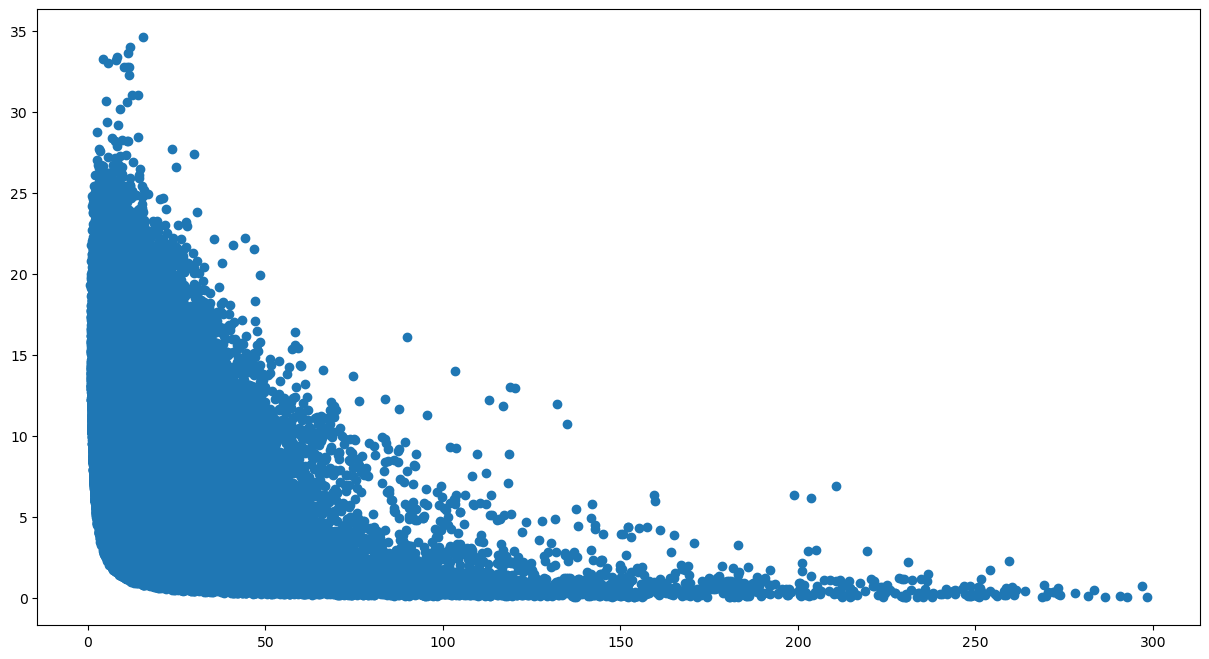

In [90]:
# Plot scatter plot for average speed vs time duration
plt.figure(figsize=(15,8))
plt.scatter(filtered_df["time_duration"], filtered_df["average_speed"])

Let's sort the values of our distance traveled to once again better view the minimum and maxiumum value of our distance traveled data point. 

In [91]:
# Sort observations by distances
filtered_df.sort_values(by='distance_km')

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
208772,2024-02-10 07:11:23,2024-02-10 07:13:39,Rhode Island Ave Metro,MBT & Bryant St NE,38.920606,-76.995917,38.922404,-76.996023,2.266667,True,False,0.200085,5.296356
52290,2024-02-07 18:01:10,2024-02-07 18:02:53,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.716667,False,True,0.200238,6.998611
142630,2024-02-05 20:27:41,2024-02-05 20:28:44,19th & G St NW,18th St & Pennsylvania Ave NW,38.898412,-77.043182,38.899680,-77.041539,1.050000,False,True,0.200238,11.442173
146385,2024-02-14 13:38:16,2024-02-14 14:05:01,18th St & Pennsylvania Ave NW,19th & G St NW,38.899680,-77.041539,38.898412,-77.043182,26.750000,False,True,0.200238,0.449132
97494,2024-02-27 18:33:58,2024-02-27 18:35:29,18th St & Pennsylvania Ave NW,19th & G St NW,38.899680,-77.041539,38.898412,-77.043182,1.516667,False,True,0.200238,7.921505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179319,2024-02-17 16:35:13,2024-02-17 18:18:44,Blenheim Blvd & North St,New Hampshire Ave & T St NW,38.846972,-77.303349,38.915544,-77.038252,103.516667,False,True,24.180314,14.015317
116960,2024-02-18 11:30:08,2024-02-18 15:00:58,Monroe St & Monroe Pl,Columbus Circle / Union Station,39.083673,-77.149162,38.896960,-77.004930,210.833333,False,False,24.216295,6.891594
121869,2024-02-03 09:58:54,2024-02-03 11:57:54,Reston Town Center Metro North,34th & Water St NW,38.953618,-77.359698,38.903731,-77.067528,119.000000,True,False,25.874758,13.046097
19418,2024-02-24 07:15:11,2024-02-24 09:15:29,North Shore & Cameron Crescent Dr/Crescent Apa...,Harvard St & Adams Mill Rd NW,38.970145,-77.338663,38.927872,-77.043358,120.300000,True,False,25.966048,12.950648


In [92]:
# Calculate median of time duration data points
filtered_df["time_duration"].median()

9.133333333333333

In [93]:
# Reset indices
filtered_df.reset_index(drop=True, inplace=True)

In [94]:
# Sort the distances, and print out first 50
filtered_df["distance_km"].sort_values()[:50]

18900     0.200085
35682     0.200238
139530    0.200238
747       0.200238
51195     0.200238
126341    0.200238
14959     0.200238
47        0.200238
70748     0.200692
17166     0.200692
192859    0.200692
135723    0.200692
2291      0.200692
14464     0.200822
110637    0.200850
63651     0.200859
34083     0.200859
18501     0.200859
513       0.200859
16992     0.200859
50028     0.200859
38037     0.200859
216       0.200863
106780    0.200863
9866      0.200863
45        0.200863
215       0.200946
103104    0.200946
71008     0.200946
18305     0.200946
9189      0.200946
66036     0.200946
44133     0.200946
88778     0.200946
88777     0.200946
85539     0.200946
45525     0.200946
63733     0.200946
149627    0.201076
57516     0.201290
89196     0.201290
51994     0.201290
79742     0.201290
145868    0.201565
86344     0.201589
107927    0.201703
7079      0.202580
60881     0.202655
63108     0.202655
105399    0.202655
Name: distance_km, dtype: float64

In [95]:
# Locating one specific observation
filtered_df.iloc[3830]

started_at                     2024-02-16 12:32:00
ended_at                       2024-02-16 12:48:59
start_station_name                   1st & N St SE
end_station_name                     1st & I St SE
start_lat                                38.875023
start_lng                               -77.005754
end_lat                                  38.878854
end_lng                                 -77.005727
time_duration                            16.983333
rideable_type_electric_bike                  False
member_casual_member                         False
distance_km                               0.426066
average_speed                             1.505236
Name: 3830, dtype: object

In [96]:
# Print out top of table to check
df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,5th & K St NW,38.910893,-77.005023,38.903040,-77.019027,8.766667,True,True,1.493573,10.222169
1,2024-02-15 16:46:51,2024-02-15 16:59:44,Metro Center / 12th & G St NW,Columbia Rd & Georgia Ave NW,38.898400,-77.027643,38.928121,-77.023795,12.883333,True,True,3.321546,15.469038
2,2024-02-07 17:42:09,2024-02-07 18:12:20,4th & C St SW,Columbia Rd & Georgia Ave NW,38.886372,-77.017701,38.928121,-77.023795,30.183333,False,True,4.672147,9.287537
3,2024-02-22 16:43:35,2024-02-22 16:56:25,4th & M St SE,Columbus Circle / Union Station,38.876751,-77.000736,38.896960,-77.004930,12.833333,False,True,2.276269,10.642297
4,2024-02-10 01:11:14,2024-02-10 01:23:52,Virginia Ave & 25th St NW,20th & O St NW / Dupont South,38.898460,-77.053052,38.908905,-77.044780,12.633333,False,False,1.364261,6.479339


In [97]:
# Calculate mean of average speed for electric bikes
filtered_df[filtered_df["rideable_type_electric_bike"] == 1]["average_speed"].mean()

12.899207440468947

In [98]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed
0,2024-02-25 19:14:16,2024-02-26 00:00:50,14th & V St NW,13th & U St NW,38.917709,-77.031844,38.916936,-77.029631,286.566667,True,False,0.209854,0.043938
1,2024-02-10 13:55:29,2024-02-10 18:53:54,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.416667,False,False,0.282017,0.056703
2,2024-02-26 09:58:42,2024-02-26 14:27:35,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,268.883333,False,False,0.314635,0.070209
3,2024-02-09 07:44:06,2024-02-09 10:45:01,1st & M St SE,1st & I St SE,38.876893,-77.006072,38.878854,-77.005727,180.916667,False,False,0.220127,0.073004
4,2024-02-03 21:26:55,2024-02-04 00:21:16,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,174.350000,True,False,0.214356,0.073768


In [99]:
# Calculate median of distance column
filtered_df["distance_km"].median()

1.537074951718592

### Some Exploratory Analysis #6
Let's perform some more exploratory analysis. Let's plot a histogram of the frequency of observations for our distances. *Why do you think we are doing this?* THEN PROVIDE SOME REASON.

(array([1.93578e+05, 3.67050e+04, 4.27900e+03, 8.12000e+02, 1.75000e+02,
        2.70000e+01, 1.30000e+01, 2.00000e+00, 2.00000e+00, 7.00000e+00]),
 array([ 0.20008456,  2.81035662,  5.42062868,  8.03090074, 10.6411728 ,
        13.25144487, 15.86171693, 18.47198899, 21.08226105, 23.69253311,
        26.30280517]),
 <BarContainer object of 10 artists>)

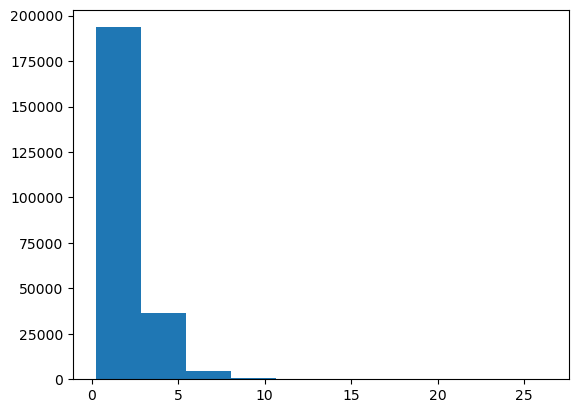

In [100]:
# Create histogram for distances
plt.hist(filtered_df["distance_km"])

### Some Interesting Data Cleaning: Ranking
Let's now create a new column, data point, called rank. This data point will represent the frequency of a start or end station being the destination across all observations. So, a higher rank for a start station indicates more people start at that station then others, while low rank means less people begin at that station. The same applies for the end station. This rank system is an example of modifying our data to be a data point that is usable. We can't really pass in string values, such as the station names, into the machine learning model. Therefore, transforming it into an integer value, such as rank, can help make it useful.

In [54]:
# Rank start stations based on occurrences
start_station_rank = filtered_df['start_station_name'].value_counts().rank(ascending=False, method='min')

# Rank stop stations based on occurrences
end_station_rank = filtered_df['end_station_name'].value_counts().rank(ascending=False, method='min')

# Assign ranks to start and stop stations
filtered_df['start_station_rank'] = filtered_df['start_station_name'].map(start_station_rank)
filtered_df['end_station_rank'] = filtered_df['end_station_name'].map(end_station_rank)

In [55]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,54.0
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,45.0,46.0
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,369.0,322.0
3,2024-02-09 07:44:00,2024-02-09 10:45:00,1st & M St SE,1st & I St SE,38.876893,-77.006072,38.878854,-77.005727,181.0,0,0,0.220127,0.072970,137.0,40.0
4,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,42.0,57.0


### Using MinMaxScaler to Scale Ranks
Talk about the reasoning behind minmaxscaler

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Reshape ranks to a 2D array for scaling
start_station_rank_scaled = scaler.fit_transform(filtered_df['start_station_rank'].values.reshape(-1, 1))
end_station_rank_scaled = scaler.fit_transform(filtered_df['end_station_rank'].values.reshape(-1, 1))

# Assign scaled ranks to DataFrame
filtered_df['start_station_rank_scaled'] = start_station_rank_scaled
filtered_df['end_station_rank_scaled'] = end_station_rank_scaled

In [57]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank,start_station_rank_scaled,end_station_rank_scaled
0,2024-02-25 19:14:00,2024-02-26 00:00:00,14th & V St NW,13th & U St NW,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,54.0,0.006748,0.071816
1,2024-02-10 13:55:00,2024-02-10 18:53:00,13th & O St NW/ Logan Circle,14th & Q St NW,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,45.0,46.0,0.059379,0.060976
2,2024-02-26 09:58:00,2024-02-26 14:27:00,Prince St & Union St,Market Square / King St & Royal St,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,369.0,322.0,0.496626,0.434959
3,2024-02-09 07:44:00,2024-02-09 10:45:00,1st & M St SE,1st & I St SE,38.876893,-77.006072,38.878854,-77.005727,181.0,0,0,0.220127,0.072970,137.0,40.0,0.183536,0.052846
4,2024-02-03 21:26:00,2024-02-04 00:21:00,21st & I St NW,22nd & I St NW / Foggy Bottom,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,42.0,57.0,0.055331,0.075881


After creating new columns for data points, based off of some the existing data, we can drop the columns which cannot really be used for our machine learning model.

In [58]:
# Drop the start and end station columns
filtered_df.drop(["start_station_name", "end_station_name"], axis=1, inplace=True)

In [59]:
# Print top of table to check
filtered_df.head()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,time_duration,rideable_type_electric_bike,member_casual_member,distance_km,average_speed,start_station_rank,end_station_rank,start_station_rank_scaled,end_station_rank_scaled
0,2024-02-25 19:14:00,2024-02-26 00:00:00,38.917709,-77.031845,38.916936,-77.029631,286.0,1,0,0.209854,0.044025,6.0,54.0,0.006748,0.071816
1,2024-02-10 13:55:00,2024-02-10 18:53:00,38.908735,-77.029779,38.910674,-77.031880,298.0,0,0,0.282017,0.056782,45.0,46.0,0.059379,0.060976
2,2024-02-26 09:58:00,2024-02-26 14:27:00,38.803124,-77.040363,38.804718,-77.043363,269.0,0,0,0.314635,0.070179,369.0,322.0,0.496626,0.434959
3,2024-02-09 07:44:00,2024-02-09 10:45:00,38.876893,-77.006072,38.878854,-77.005727,181.0,0,0,0.220127,0.072970,137.0,40.0,0.183536,0.052846
4,2024-02-03 21:26:00,2024-02-04 00:21:00,38.900722,-77.046442,38.900880,-77.048911,175.0,1,0,0.214356,0.073494,42.0,57.0,0.055331,0.075881


In [60]:
# Drop time columns as we already have the calculated time duration column
filtered_df.drop(["started_at", "ended_at"], axis = 1, inplace=True)

# Drop the longitude and latitude measurements since we have our calculated distance column
filtered_df.drop(["start_lat", "start_lng", "end_lat", "end_lng"], axis = 1, inplace=True)

# Print out top of table to check
filtered_df.head()

## Part 3: Model training and testing
Finally, we've reached the fun part of the tutorial, the part where we actually do the interesting stuff: model training and testing. Now, there are so many different machine learning models, how do we decide which one to use?

First, we need to decide if our problem is a regression or classfication problem. In our case... Based off of your problem, there are different algorithms you can use. In order to decide from here, you need to understand the algorithms, as each one has its advantages and disadvantages. But, this process may just be trial and error, testing a number of different machine learning algorithms. 

To truely understand each algorithm would be overwhelming for this tutorial, however, we will provide external links for if you want to learn more. What's important is that you get a basic understanding of each algorithm that we use in this tutorial, as well as, how we are analyzing or scoring its performance for predicting the metric we want. 

The goal of model training and testing is...

<center><img src="https://imgs.xkcd.com/comics/machine_learning.png"></center>

### Standard Scaler?

In [63]:
from sklearn.model_selection import train_test_split

X = filtered_df.drop(["rideable_type_electric_bike", "average_speed"], axis=1)
y = filtered_df['rideable_type_electric_bike']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [68]:
predictions = rf.predict(X_test_scaled)

### Classification Report and Confusion Matrix

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85     29815
           1       0.78      0.64      0.71     17299

    accuracy                           0.80     47114
   macro avg       0.80      0.77      0.78     47114
weighted avg       0.80      0.80      0.80     47114



In [71]:
print(confusion_matrix(y_test, predictions))

[[26688  3127]
 [ 6178 11121]]


### Grid Search CV w/ Random Forest

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# Define the parameter grid you want to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor instance
rf = RandomForestClassifier()

# Initialize GridSearchCV with the parameter grid and RandomForestClassifier
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Print the best score found
print("Best score:", grid_search.best_score_)

predictions = grid_search.predict(X_test)

mse = mean_squared_error(y_test, predictions)

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
# start_station_rank	end_station_rank remove these columns

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

### K-Fold Cross Validation

In [ ]:
X = filtered_df.drop(["distance_km", "average_speed"], axis=1)
y = filtered_df['distance_km']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

### Sequential?

In [ ]:
model = Sequential()

model.add(Dense(units = 20, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dropout(.1))
model.add(Dense(units = 1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

### Early Stopping?

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#stops when validation loss is not dropping for 3 epochs
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 15, verbose = 1)

In [ ]:
#Fitting model
model.fit(X_train, y_train, 
          epochs = 800,
         validation_data=(X_test, y_test),
         verbose = 1, 
         callbacks=[early_stop])

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, prediction)

In [ ]:
mse

## Part 4: Interpretation of Results
Interpret the results, and explain intuition behind it. Assume person does not have greatest knowledge of Data Science.

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Top-6-data-collection-methods-700x545.png"></center>

## Conclusion
Restate importance of our tutorial, and takeaways.

<center><img src="https://www.jotform.com/blog/wp-content/uploads/2019/10/Data-collection-and-lead-generation-700x545.png"></center>

## References
Include links to external sources or other info for more learning